# Using LaTeX-compatible plotting in notebooks

This notebook demonstrates how to use the `mpl_tex_settings` module in Jupyter notebooks.

In [1]:
import numpy as np
import sys
import os

# Add the path to import the config module
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import the matplotlib settings
from config.mpl_tex_settings import *
import matplotlib as mpl
import matplotlib.pyplot as plt

# Confirm that settings are loaded
print(f"LaTeX is {'enabled' if plt.rcParams['text.usetex'] else 'disabled'}")
print(f"Font: {plt.rcParams['font.serif'][0]}")
print(f"Backend: {mpl.get_backend()}")

findfont: Font family ['Palatino'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Computer Modern Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIX'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Georgia'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Computer Modern Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIX'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Georgia'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.
fin

📊 Matplotlib settings loaded
   - LaTeX rendering: Enabled
   - Font: serif (fallback from Palatino)
   - Backend: module://matplotlib_inline.backend_inline
   - Default figure size: (10, 8)
LaTeX is enabled
Font: serif
Backend: module://matplotlib_inline.backend_inline


## Example Plot with Scientific Formatting

Let's create a plot with proper scientific formatting using our LaTeX settings.

In [2]:
from scipy.special import factorial
# Function to generate data
def quantum_oscillator(t, omega, n):
    """Generate quantum harmonic oscillator wavefunction probability density."""
    # Hermite polynomial (physicist's version)
    def hermite(x, n):
        if n == 0:
            return np.ones_like(x)
        elif n == 1:
            return 2 * x
        else:
            return 2 * x * hermite(x, n-1) - 2 * (n-1) * hermite(x, n-2)
    
    # Constants
    hbar = 1.0  # Normalized units
    m = 1.0     # Normalized mass
    
    # Position space
    x = np.linspace(-5, 5, 1000)
    
    # Angular frequency and time evolution
    phase = omega * t
    
    # Normalization constant
    norm = 1.0 / (np.sqrt(2**n * factorial(n) * np.sqrt(np.pi)))
    
    # Wavefunction (time-independent part)
    psi = norm * hermite(x, n) * np.exp(-x**2 / 2) * np.exp(-1j * (n + 0.5) * phase)
    
    # Probability density
    prob_density = np.abs(psi)**2
    
    return x, prob_density

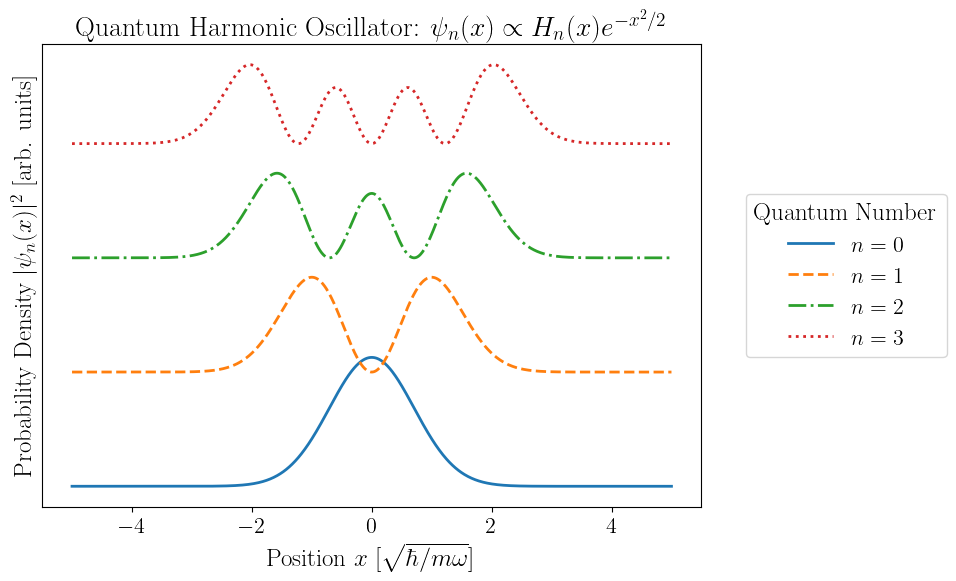

In [3]:
# Create a figure with optimal size for LaTeX
fig, ax = plt.subplots(figsize=set_size(width_pt=900, fraction=0.8))

# Generate data for different quantum states
t = 0  # Initial time
omega = 1.0  # Angular frequency
max_n = 4  # Maximum quantum number

# Plot different quantum states with appropriate formatting
for n in range(max_n):
    x, prob = quantum_oscillator(t, omega, n)
    
    # Plot with proper styling
    ax.plot(x, prob + n*0.5,  # Offset for visibility
            color=f'C{n}',
            linestyle=LINE_STYLES[n % len(LINE_STYLES)],
            linewidth=2,
            label=f'$n={n}$')
    
# Add proper labels with LaTeX formatting
ax.set_xlabel(r'Position $x$ [$\sqrt{\hbar/m\omega}$]')
ax.set_ylabel(r'Probability Density $|\psi_n(x)|^2$ [arb. units]')

# Set title with LaTeX equation
ax.set_title(r'Quantum Harmonic Oscillator: $\psi_n(x) \propto H_n(x)e^{-x^2/2}$')

# Add legend
ax.legend(title=r'Quantum Number', frameon=True, loc='center left', bbox_to_anchor=(1.05, 0.5))

# Remove y-ticks as they are arbitrary
ax.set_yticks([])

# Show the plot
plt.tight_layout()
plt.show()

## Saving Figures

Use the `save_fig` function to save figures consistently:

In [4]:
# Save the figure (creates appropriate directory structure)
save_fig(fig, 'quantum_oscillator_states')

Figure saved as: /home/leopold/Projects/Master_thesis/figures/figures_from_python/misc/quantum_oscillator_states


## Using Scientific Notation

The `format_sci_notation` function helps with properly formatted scientific notation:

Standard values:
0.0001 → $10^{-4}$
1000 → $10^{3}$
2.5e-6 → $2.5 \times 10^{-6}$
1e5 → $10^{5}$


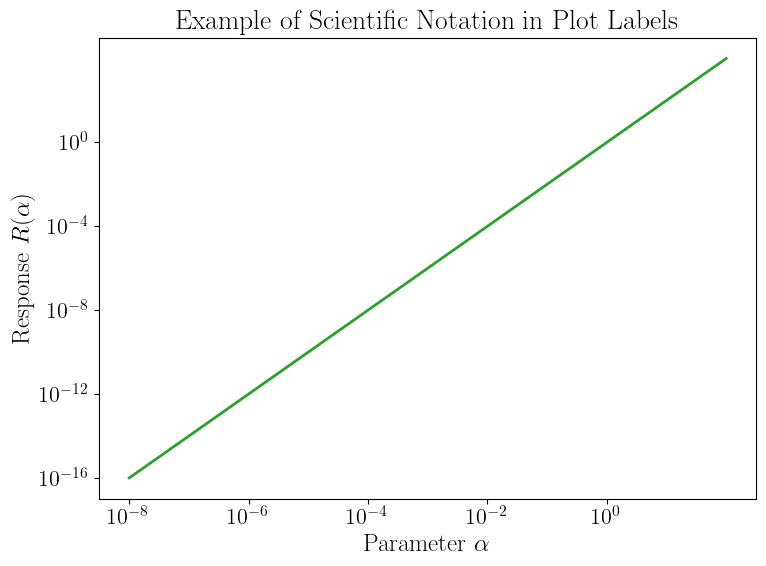

In [5]:
# Example of scientific notation formatting
print(f"Standard values:")
print(f"0.0001 → {format_sci_notation(0.0001)}")
print(f"1000 → {format_sci_notation(1000)}")
print(f"2.5e-6 → {format_sci_notation(2.5e-6)}")
print(f"1e5 → {format_sci_notation(1e5)}")

# Create a simple plot with scientific notation
fig, ax = plt.subplots(figsize=(8, 6))
x = np.logspace(-8, 2, 1000)
y = x**2

ax.loglog(x, y, 'C2-', linewidth=2)
ax.set_xlabel('Parameter $\\alpha$')
ax.set_ylabel('Response $R(\\alpha)$')

# Add formatted tick labels
ax.set_xticks([1e-8, 1e-6, 1e-4, 1e-2, 1e0])
ax.set_xticklabels([format_sci_notation(val) for val in [1e-8, 1e-6, 1e-4, 1e-2, 1e0]])

ax.set_yticks([1e-16, 1e-12, 1e-8, 1e-4, 1e0])
ax.set_yticklabels([format_sci_notation(val) for val in [1e-16, 1e-12, 1e-8, 1e-4, 1e0]])

plt.title('Example of Scientific Notation in Plot Labels')
plt.tight_layout()
plt.show()

## Testing TeX Syntax Rendering With and Without LaTeX

This section demonstrates how matplotlib handles TeX syntax when LaTeX is available or not available on the system.

Current TeX setting: Enabled


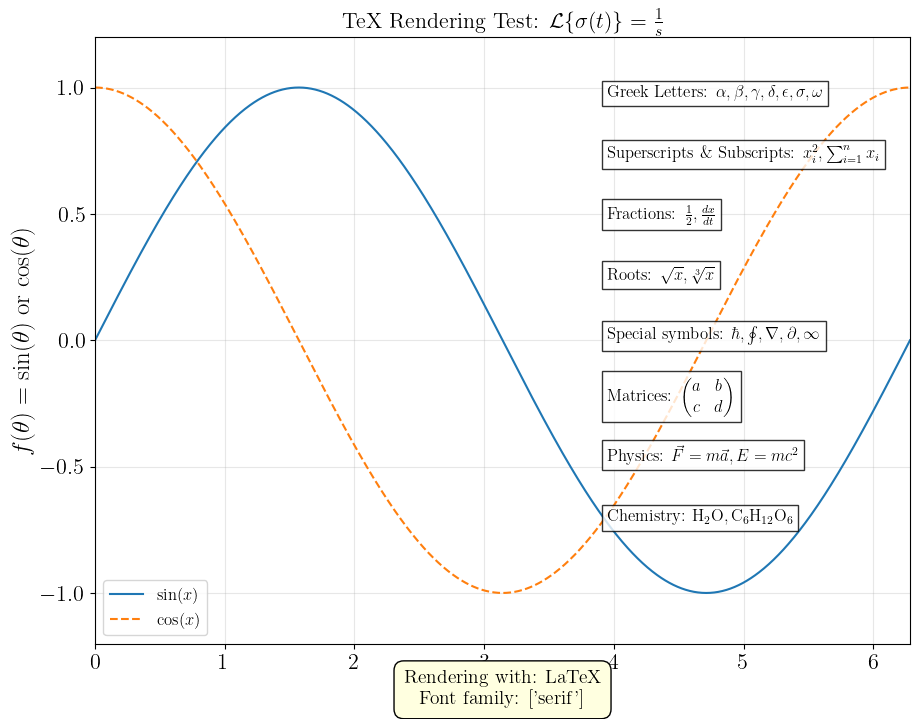

Plot rendered using: LaTeX

Forcing TeX setting: Disabled


ValueError: 
\left(\begin{array}{cc} a & b \\ c & d \end{array}\right)
      ^
ParseSyntaxException: Expected '\\right', found '\'  (at char 6), (line:1, col:7)

Error in callback <function _draw_all_if_interactive at 0x76bdc7661bc0> (for post_execute):


ValueError: 
\left(\begin{array}{cc} a & b \\ c & d \end{array}\right)
      ^
ParseSyntaxException: Expected '\\right', found '\'  (at char 6), (line:1, col:7)

ValueError: 
\left(\begin{array}{cc} a & b \\ c & d \end{array}\right)
      ^
ParseSyntaxException: Expected '\\right', found '\'  (at char 6), (line:1, col:7)

<Figure size 1000x800 with 1 Axes>

In [6]:
# Create a function to demonstrate TeX rendering
def compare_tex_rendering(use_tex=None):
    """
    Create a plot with various TeX syntaxes to show how they're rendered.
    
    Parameters:
    -----------
    use_tex : bool or None
        If None, uses system default (based on LaTeX availability)
        If True, forces LaTeX rendering
        If False, forces mathtext rendering
    """
    # Save current state
    current_usetex = plt.rcParams['text.usetex']
    
    # Set requested rendering mode if specified
    if use_tex is not None:
        plt.rcParams['text.usetex'] = use_tex
    
    # Create a plot with various TeX expressions
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Create some data
    x = np.linspace(0, 2*np.pi, 1000)
    y1 = np.sin(x)
    y2 = np.cos(x)
    
    # Plot with TeX labels
    ax.plot(x, y1, 'C0-', label=r'$\sin(x)$')
    ax.plot(x, y2, 'C1--', label=r'$\cos(x)$')
    
    # Add a grid and legend
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=12)
    
    # Check if we're using LaTeX or mathtext
    using_latex = plt.rcParams['text.usetex']
    
    # Add title with appropriate rendering
    plt.title(r'TeX Rendering Test: $\mathcal{L}\{\sigma(t)\} = \frac{1}{s}$', fontsize=16)
    
    # Add text annotations with various TeX elements
    # Using different syntax for matrix based on LaTeX availability
    if using_latex:
        matrix_text = r'Matrices: $\begin{pmatrix} a & b \\ c & d \end{pmatrix}$'
    else:
        matrix_text = r'Matrices: $\left(\begin{array}{cc} a & b \\ c & d \end{array}\right)$'
    
    elements = [
        (0.1, 0.9, r'Greek Letters: $\alpha, \beta, \gamma, \delta, \epsilon, \sigma, \omega$'),
        (0.1, 0.8, r'Superscripts \& Subscripts: $x_i^2, \sum_{i=1}^{n} x_i$'),
        (0.1, 0.7, r'Fractions: $\frac{1}{2}, \frac{dx}{dt}$'),
        (0.1, 0.6, r'Roots: $\sqrt{x}, \sqrt[3]{x}$'),
        (0.1, 0.5, r'Special symbols: $\hbar, \oint, \nabla, \partial, \infty$'),
        (0.1, 0.4, matrix_text),
        (0.1, 0.3, r'Physics: $\vec{F} = m\vec{a}, E = mc^2$'),
        (0.1, 0.2, r'Chemistry: $\mathrm{H}_2\mathrm{O}, \mathrm{C}_6\mathrm{H}_{12}\mathrm{O}_6$')
    ]
    
    for x_pos, y_pos, text in elements:
        ax.text(x_pos * 2*np.pi, y_pos, text, fontsize=12, 
                transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.8))
    
    # Add information about rendering mode
    renderer = "LaTeX" if plt.rcParams['text.usetex'] else "Mathtext"
    font_family = plt.rcParams['font.family']
    
    ax.text(0.5, -0.1, f"Rendering with: {renderer}\nFont family: {font_family}", 
            ha='center', transform=ax.transAxes, fontsize=14,
            bbox=dict(facecolor='lightyellow', edgecolor='black', boxstyle='round,pad=0.5'))
            
    # Add x and y labels with TeX
    ax.set_xlabel(r'Angle $\theta$ [rad]')
    ax.set_ylabel(r'$f(\theta) = \sin(\theta)$ or $\cos(\theta)$')
    
    # Set axes limits
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1.2, 1.2)
    
    # Use figure.tight_layout instead of plt.tight_layout for better reliability
    fig.tight_layout(pad=2.0)
    plt.show()
    
    # Restore previous state
    plt.rcParams['text.usetex'] = current_usetex
    
    return renderer

# Run the function with the current system settings
print(f"Current TeX setting: {'Enabled' if plt.rcParams['text.usetex'] else 'Disabled'}")
current_renderer = compare_tex_rendering()
print(f"Plot rendered using: {current_renderer}")

# Force the opposite rendering to demonstrate the difference
opposite_setting = not plt.rcParams['text.usetex']
print(f"\nForcing TeX setting: {'Enabled' if opposite_setting else 'Disabled'}")
opposite_renderer = compare_tex_rendering(opposite_setting)
print(f"Plot rendered using: {opposite_renderer}")

# Show a comparison summary
print("\nComparison Summary:")
print("-" * 50)
print(f"1. {'LaTeX' if current_renderer == 'LaTeX' else 'Mathtext'} (System Default):")
if current_renderer == "LaTeX":
    print("   - Full LaTeX capabilities")
    print("   - Professional typesetting")
    print("   - Access to LaTeX packages")
    print("   - Consistent with document")
else:
    print("   - Built-in matplotlib renderer")
    print("   - No dependency on LaTeX")
    print("   - Faster rendering")
    print("   - Limited support for complex expressions")
    
print(f"\n2. {'LaTeX' if opposite_renderer == 'LaTeX' else 'Mathtext'} (Forced Alternative):")
if opposite_renderer == "LaTeX":
    print("   - Full LaTeX capabilities")
    print("   - Professional typesetting")
    print("   - Access to LaTeX packages")
    print("   - Consistent with document")
else:
    print("   - Built-in matplotlib renderer")
    print("   - No dependency on LaTeX")
    print("   - Faster rendering")
    print("   - Limited support for complex expressions")

### Understanding the Differences

The plots above demonstrate how matplotlib handles TeX syntax in two different scenarios:

1. **With LaTeX installed**: When LaTeX is available (`text.usetex=True`), matplotlib uses the actual LaTeX typesetting engine to render all text. This provides professional-quality mathematical typesetting with full support for LaTeX commands and packages.

2. **Without LaTeX installed**: When LaTeX is not available (`text.usetex=False`), matplotlib uses its built-in mathtext renderer. This is a TeX-like math expression parser and layout engine that can handle basic math notation but has limitations compared to full LaTeX.

#### Key Differences

| Feature | With LaTeX | Without LaTeX (mathtext) |
|---------|-----------|--------------------------|
| Typography quality | Professional LaTeX typesetting | Good but simpler |
| Complex expressions | Full LaTeX support | Limited capabilities |
| Special commands | All LaTeX commands available | Basic subset supported |
| Performance | Slower (requires external process) | Faster (built-in) |
| Dependencies | Requires LaTeX installation | No external dependencies |
| Font consistency | Perfectly matches LaTeX documents | Approximates LaTeX style |

#### Best Practices

Our configuration in `mpl_tex_settings.py` implements a flexible approach:

- Automatically detects if LaTeX is available and configures matplotlib accordingly
- Falls back to mathtext when LaTeX is not installed
- Provides consistent font styles and sizes regardless of rendering method
- Includes helper functions like `format_sci_notation()` that work in both modes

This way, your code works across different environments while providing the best possible rendering available on each system.